# Simple Image Classification using Convolutional Neural Network —             Deep Learning in python.

    Building a convolutional neural network that will be trained on few thousand images of cats and dogs, and later be able to predict if the given image is of a cat or a dog.

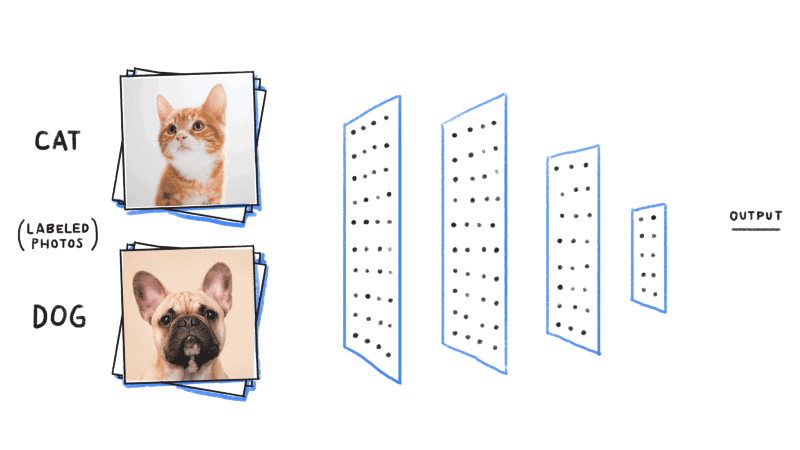

In [1]:
from IPython.display import Image
with open('/home/vimal/Desktop/sem3/visual/SimpleImageClassification/cat_dog.gif','rb') as file:
    display(Image(file.read()))



**Coding** : we are going to use Keras deep learning library in python to build CNN(Convolutional Neural Network)

**Dataset description** : Dataset contains two folders training_set and test_set which contain two subfolders cats and dogs.There are 10,000 images of both cats and dogs, from  that 8000 is used for training and 2000 is used for testing the model. 

The process of **building a Convolutional Neural Network** always involves four major steps.

Step - 1 : **Convolution**

Step - 2 : **Pooling**

Step - 3 : **Flattening**

Step - 4 : **Full connection**

# Code

Import all the required keras packages. There is two ways of using keras, i.e Using Tensorflow backend and by Using Theano backend.  Here we are using using Tensorflow backend.

In [1]:
# Importing the Keras libraries and packages

from keras.models import Sequential

from keras.layers import Conv2D

from keras.layers import MaxPooling2D

from keras.layers import Flatten

from keras.layers import Dense

Using TensorFlow backend.


Let's see what each of the above packages are imported for :

In **line 1**, we’ve imported Sequential from keras.models, to initialise our neural network model as a sequential network. There are two basic ways of initialising a neural network, either by a sequence of layers or as a graph.

In **line 2**, we’ve imported Conv2D from keras.layers, this is to perform the convolution operation i.e the first step of a CNN, on the training images. Since we are working on images here, which a basically 2 Dimensional arrays, we’re using Convolution 2-D

In **line 3**, we’ve imported MaxPooling2D from keras.layers, which is used for pooling operation, that is the step — 2 in the process of building a cnn. In MaxPooling we need the maximum value pixel from the respective region of interest.

In **line 4**, we’ve imported Flatten from keras.layers, which is used for Flattening. Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector.

In **line 5**, we’ve imported Dense from keras.layers, which is used to perform the full connection of the neural network, which is the step 4 in the process of building a CNN.

Create an object of the sequential class:

In [4]:
classifier = Sequential()

Convolution step:

In [5]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

The Conv2D function is taking 4 arguments, the first is the number of filters i.e 32 here, the second argument is the shape each filter is going to be i.e 3x3 here, the third is the input shape and the type of image(RGB or Black and White)of each image i.e the input image our CNN is going to be taking is of a 64x64 resolution and “3” stands for RGB, which is a colour img, the fourth argument is the activation function we want to use, here ‘relu’ stands for a rectifier function.

Next operation is pooling. The primary aim of a pooling operation is to reduce the size of the images as much as possible.

In [6]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Now convert all the pooled images into a continuous vector through Flattening.  i.e pooled image pixels and converting them to a one dimensional single vector.

In [7]:
classifier.add(Flatten())

Next is to create a fully connected layer, and to this layer we are going to connect the set of nodes we got after the flattening step, these nodes will act as an input layer to these fully-connected layers. As this layer will be present between the input layer and output layer, we can refer to it a hidden layer.

In [8]:
classifier.add(Dense(units = 128, activation = 'relu'))

Dense is the function to add a fully connected layer, ‘units’ is where we define the number of nodes that should be present in this hidden layer, these units value will be always between the number of input nodes and the output nodes but the art of choosing the most optimal number of nodes can be achieved only through experimental tries. Though it’s a common practice to use a power of 2. And the activation function will be a rectifier function.

Now initialise our output layer, which should contain only one node, as it is binary classification. This single node will give us a binary output of either a Cat or Dog.

In [9]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Now the code for CNN Model is completed. Compile it.

In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Optimizer parameter is to choose the stochastic gradient descent algorithm. Loss parameter is to choose the loss function. Finally, the metrics parameter is to choose the performance metric.

Now pre-process the images to prevent over-fitting. Overfitting is when you get a great training accuracy and very poor test accuracy due to overfitting of nodes from one layer to another.

So before we fit our images to the neural network, we need to perform some image augmentations on them, which is basically synthesising the training data.

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 5161 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Now lets fit the data to our model.

In [16]:
classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 10,
validation_data = test_set,
validation_steps = 2000)

Epoch 1/10
8000/8000 [==============================] - 2850s 356ms/step - loss: 0.4376 - acc: 0.7939 - val_loss: 0.6613 - val_acc: 0.7366
Epoch 2/10
8000/8000 [==============================] - 2821s 353ms/step - loss: 0.3239 - acc: 0.8581 - val_loss: 0.8503 - val_acc: 0.7200
Epoch 3/10
8000/8000 [==============================] - 2824s 353ms/step - loss: 0.2518 - acc: 0.8931 - val_loss: 0.9747 - val_acc: 0.7372
Epoch 4/10
8000/8000 [==============================] - 2822s 353ms/step - loss: 0.2052 - acc: 0.9148 - val_loss: 1.2614 - val_acc: 0.7113
Epoch 5/10
8000/8000 [==============================] - 2855s 357ms/step - loss: 0.1749 - acc: 0.9295 - val_loss: 1.4422 - val_acc: 0.6974
Epoch 6/10
8000/8000 [==============================] - 2827s 353ms/step - loss: 0.1539 - acc: 0.9388 - val_loss: 1.6442 - val_acc: 0.6996
Epoch 7/10
8000/8000 [==============================] - 2826s 353ms/step - loss: 0.1393 - acc: 0.9458 - val_loss: 1.7461 - val_acc: 0.7051
Epoch 8/10
8000/8000 [=====

Here  ‘steps_per_epoch’ holds the number of training images, i.e the number of images the training_set folder contains.

And ‘epochs’, A single epoch is a single step in training a neural network; in other words when a neural network is trained on every training samples only in one pass we say that one epoch is finished.

# Making new predictions from our trained model :

In [28]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/vimal/Desktop/sem3/visual/SimpleImageClassification/image3.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result[0][0])
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1.0
dog


The test_image holds the image that needs to be tested on the CNN. Once we have the test image, we will prepare the image to be sent into the model by converting its resolution to 64x64 as the model only excepts that resolution. Then we are using predict() method on our classifier object to get the prediction. As the prediction will be in a binary form, we will be receiving either a 1 or 0, which will represent a dog or a cat respectively.